In [28]:
# initial imports
import torch
import numpy as np

import matplotlib.pyplot as plt

## 1. Different types of tensors using pytorch

1. empty tensor - uninitialized.  the tensor dimensions can be specified, but it's empty.

`torch.empty(DIMENSIONS)`
2. randomly initialized tensor

`torch.rand(DIMENSIONS)`
3. tensor initialized with zeros

`torch.zeros(DIMENSIONS)`
4. tensor initialized with ones

`torch.ones(DIMENSIONS)`
5. randomly initialized with normal distribution random numbers $\mathcal{N} (\mu = 0, \sigma^2 = 1)$

`torch.randn_like(DIMENSIONS)` $\rightarrow$ we can initialize using `_like()` functions

Let's try random initialization with normal distribution in 5.  Given a tensor, `randn_like` will initialize that function with normal distribution.

In [2]:
x = torch.ones(2000)

In [3]:
x_randn = torch.randn_like(x)

To make sure, we can try to plot the distribution.

In [4]:
sorted_x, sorted_indices = x_randn.sort()

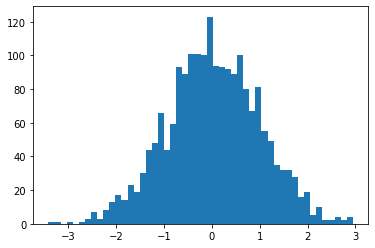

In [5]:
plt.hist(sorted_x, bins = 50)
plt.show()

cool.  I'm better convinced that this is normally random.

## 2. Operations

1. [Addition](#addition)
2. [in-place operations](#in-place-operations)
3. [mathematical operations](#mathematical-operations)
4. [broadcasting](#broadcasting)
5. [matrix multiplication](#matrix-multiplication)
    - dot product
    - matrix product
6. changing dimensions


<a id='addition'></a>
### 2.1 Addition 

First, we define a couple tensors for our purposes. 

In [6]:
x = torch.randn(2,3,1,2)

In [7]:
x

tensor([[[[ 1.0341,  0.2004]],

         [[-0.6410, -1.2692]],

         [[ 1.2683,  0.3775]]],


        [[[-1.5204,  1.1605]],

         [[ 0.4699, -1.1930]],

         [[ 0.0153, -0.1653]]]])

Taking a look at this, let's break down the dimensions and count.

```
tensor([
        [    
             [   [ 1.1677,  0.2297]   ],

             [   [-0.5983,  1.2568]   ],

             [   [-1.2132,  0.0813]   ]
        ],


        [    
             [   [-0.4010,  0.4659]   ],

             [   [ 1.2019,  0.5684]   ],

             [   [ 0.5998,  0.2074]   ]
        ]
       ])
```
Spacing out to make clear how dimensions are represented in pytorch.  Note that the $3^{rd}$ dimension is not represented, since it's 1.

Now we define couple more vectors.

In [8]:
y = torch.randn(2,3,1,2)
z = torch.randn(2,3,2  )
a = torch.randn(  3,1,2)
b = torch.randn(2,3,1  )

We can use various representation to add two tensors: `+`, `torch.add(tensor)`

In [9]:
x+y

tensor([[[[ 0.9359, -0.5165]],

         [[-0.6658, -1.5960]],

         [[ 1.7028,  0.3911]]],


        [[[-0.4211,  1.1572]],

         [[ 1.4036, -1.3754]],

         [[ 0.6938, -0.4454]]]])

In [10]:
y+x

tensor([[[[ 0.9359, -0.5165]],

         [[-0.6658, -1.5960]],

         [[ 1.7028,  0.3911]]],


        [[[-0.4211,  1.1572]],

         [[ 1.4036, -1.3754]],

         [[ 0.6938, -0.4454]]]])

In [11]:
x.add(y)

tensor([[[[ 0.9359, -0.5165]],

         [[-0.6658, -1.5960]],

         [[ 1.7028,  0.3911]]],


        [[[-0.4211,  1.1572]],

         [[ 1.4036, -1.3754]],

         [[ 0.6938, -0.4454]]]])

<a id= in-place-operations></a>
### 2.2 In-place operations

Sometimes we want to operate on a tensor and modify it.  This can be done using `_`.  To do this, we first make a copy of a tensor using `tensor.clone()` method. 

In [12]:
x_copy = x.clone()

In [13]:
x_copy

tensor([[[[ 1.0341,  0.2004]],

         [[-0.6410, -1.2692]],

         [[ 1.2683,  0.3775]]],


        [[[-1.5204,  1.1605]],

         [[ 0.4699, -1.1930]],

         [[ 0.0153, -0.1653]]]])

Then, we do an in-place operation to add `x_copy` and `y`

In [14]:
x_copy.add_(y)

tensor([[[[ 0.9359, -0.5165]],

         [[-0.6658, -1.5960]],

         [[ 1.7028,  0.3911]]],


        [[[-0.4211,  1.1572]],

         [[ 1.4036, -1.3754]],

         [[ 0.6938, -0.4454]]]])

Now, we see that this tensor is modified

In [15]:
x_copy

tensor([[[[ 0.9359, -0.5165]],

         [[-0.6658, -1.5960]],

         [[ 1.7028,  0.3911]]],


        [[[-0.4211,  1.1572]],

         [[ 1.4036, -1.3754]],

         [[ 0.6938, -0.4454]]]])

However, the original tensor is un-modified.

In [16]:
x

tensor([[[[ 1.0341,  0.2004]],

         [[-0.6410, -1.2692]],

         [[ 1.2683,  0.3775]]],


        [[[-1.5204,  1.1605]],

         [[ 0.4699, -1.1930]],

         [[ 0.0153, -0.1653]]]])

Other types of in-place operations:

- `abs_()`
- `acos_()`: inverse cosine of input and then save to the variable.
- `addmm_(input-matrix, m1, m2)`: matrix multiply `m1` and `m2`, then add to `input-matrix`.

... etc.

<a id=mathematical-operations></a>
### 2.3 Mathematical Operations

#### Pointwise Ops

- bitwise ops: `torch.bitwise_not`, `torch.bitwise_xor`
- `torch.clamp(input, min, max)`: "clamp" all elements to range of \[`min`, `max`\].
- `torch.ceil(input)`: returns the closest highest integer ceiling of all elements
- `torch.floor(input)`: returns the closest lowest integer floor of all elements
- `torch.div`: btw, if you want to do integer div, you can typecast the tensors to int
- `torch.erf`, `torch.erfc`: error functions
- `torch.exp`, `torch.log`, `torch.log10`, `torch.log2`: just log is natural log
- `torch.mul(input, other, out = None)`: $out^*_i = other \times input_i$
- `torch.neg(input)`: change signs of input
- `torch.pow()`: exponentials, element-wise
- `torch.reciprocal()`: returns 1/input, element-wise
- `torch.sin()`,`torch.tanh()`,`torch.sinh()`,`torch.cosh()`: trig functions, element-wise
- `torch.sqrt()`
- `torch.sigmoid()`


#### Reduction Ops
- `torch.argmin`,`torch.argmax`,`torch.min`,`torch.max` 
- `torch.mean`, `torch.median`, `torch.mode`
- `torch.prod`: product of all elements in a tensor
- `torch.sum`: sum of all elements in a tensor
- `torch.unique`: tensor of all the unique elements in input tensor
- `torch.argsort`, `torch.sort`


#### Comparison Ops
- `torch.eq`: element-wise equality
- `torch.equal`: tensor-wise equality
- `torch.le`, `torch.ge`, `torch.gt`: element-wise comparisons -> tensor of bools
- `torch.topk(input,largest=True)`: topk elements


#### Spectral Ops
This part mostly contains Fourier transforms. Might be useful for Computer Vision, but will not go over this at this time.

Let's try a few of these functions.  I'm gonna start with **divisions**.

In [17]:
u = torch.randint(0,10,(10,))
v = torch.randint(0,10,(10,))
print("u: ",u)
print("v: ",v)

u.div(v)

u:  tensor([2, 3, 7, 4, 1, 9, 4, 6, 0, 9])
v:  tensor([1, 3, 3, 2, 5, 2, 4, 1, 6, 6])


tensor([2, 1, 2, 2, 0, 4, 1, 6, 0, 1])

In [18]:
u = u.float()
v = v.float()
print("u: ",u)
print("v: ",v)

u.div(v)

u:  tensor([2., 3., 7., 4., 1., 9., 4., 6., 0., 9.])
v:  tensor([1., 3., 3., 2., 5., 2., 4., 1., 6., 6.])


tensor([2.0000, 1.0000, 2.3333, 2.0000, 0.2000, 4.5000, 1.0000, 6.0000, 0.0000,
        1.5000])

Now, we're gonna try **sorting**.

Sorting is operated along given dimensions.  If dimension not given, then it will pick the last dimension of input.
First, we figure out how x looks like, and what the dimension of this vector is.

In [19]:
print("dimensions: ",x.size())
print("print the tensor:\n",x)

dimensions:  torch.Size([2, 3, 1, 2])
print the tensor:
 tensor([[[[ 1.0341,  0.2004]],

         [[-0.6410, -1.2692]],

         [[ 1.2683,  0.3775]]],


        [[[-1.5204,  1.1605]],

         [[ 0.4699, -1.1930]],

         [[ 0.0153, -0.1653]]]])


In [20]:
# default sort
sorted_x, argsort_x = x.sort(descending = False)

In [21]:
sorted_x

tensor([[[[ 0.2004,  1.0341]],

         [[-1.2692, -0.6410]],

         [[ 0.3775,  1.2683]]],


        [[[-1.5204,  1.1605]],

         [[-1.1930,  0.4699]],

         [[-0.1653,  0.0153]]]])

In [22]:
# sort with dimensions
sorted_x, argsort_x = x.sort(descending = False, dim=1)

In [23]:
sorted_x

tensor([[[[-0.6410, -1.2692]],

         [[ 1.0341,  0.2004]],

         [[ 1.2683,  0.3775]]],


        [[[-1.5204, -1.1930]],

         [[ 0.0153, -0.1653]],

         [[ 0.4699,  1.1605]]]])

<div>
<img src="img/sort-along-first.png" width="280" align="left">
</div>

In [24]:
# index is also along the axis
argsort_x

tensor([[[[1, 1]],

         [[0, 0]],

         [[2, 2]]],


        [[[0, 1]],

         [[2, 2]],

         [[1, 0]]]])

In [25]:
sorted_x, argsort_x = x.sort(descending = False, dim=0)

In [26]:
sorted_x

tensor([[[[-1.5204,  0.2004]],

         [[-0.6410, -1.2692]],

         [[ 0.0153, -0.1653]]],


        [[[ 1.0341,  1.1605]],

         [[ 0.4699, -1.1930]],

         [[ 1.2683,  0.3775]]]])

<div>
<img src="img/sort-along-second.png" width="350" align="left">
</div>

In [27]:
argsort_x

tensor([[[[1, 0]],

         [[0, 0]],

         [[1, 1]]],


        [[[0, 1]],

         [[1, 1]],

         [[0, 0]]]])

<a id=broadcasting></a>
### 2.4 Broadcasting

Going over pytorch's Broadcasting semantics.

The semantics are actually quite similar to `numpy` Broadcasting semantics. 

#### 2.4.1 Review of `numpy` Broadcasting Semantics
doc reference: https://numpy.org/doc/stable/user/basics.broadcasting.html#module-numpy.doc.broadcasting

Broadcasting refers to how `numpy` deals with vectors of different sizes during arithmetic operations. Under certain constraints, smaller arrays are broadcast to larger array shape to make arithmetic operations compatible.  For instance, pointwise operations require that two arrays involved in operations have exactly the same shape. Broadcasting relaxes these constraints.


**Broadcasting rules:**

Two dimensions are considered compatible when
 - they're equal
 - one of them is 1

Line up the vector dimensions from the right side, and compare the values according to above to determine whether or not they're compatible.  The trailing dimensions have to be compatible for the operation to broadcast.

Resulting dimension would be the 

An example shown below (from reference `np` page).

In [29]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [30]:
xx = x.reshape(4,1)
xx

array([[0],
       [1],
       [2],
       [3]])

In [32]:
y = np.ones(5)
y

array([1., 1., 1., 1., 1.])

In [33]:
z = np.ones((3,4))
z

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Is x+y a possible operation? why or why not is it possible?  what do you think is the output value?

In [35]:
x+y

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

What about xx + y?  why or why not is it possible? what do you think is the output value?

In [36]:
xx+y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

`xx` has the trailing dimension of 1, and `y`'s last dimension is 5. Then, we can see that according to broadcasting semantics, the resulting output shape would be `(4,5)`. Now, when it comes to values, `xx` has to "stretch" their 2nd dimension. Then, `xx` becomes

```
array([[0,0,0,0,0],
       [1,1,1,1,1],
       [2,2,2,2,2],
       [3,3,3,3,3]])
```
`y` will also "stretch" their 1st dimension to 4.  Which means `y` will become
```
array([1., 1., 1., 1., 1.],
      [1., 1., 1., 1., 1.],
      [1., 1., 1., 1., 1.],
      [1., 1., 1., 1., 1.])
```
Then, the resulting value will become:
```
array([[1,1,1,1,1],
       [2,2,2,2,2],
       [3,3,3,3,3],
       [4,4,4,4,4]])
```
Am I right or am I right? Welp, you expand the result above and find out :D

<a id=matrix-multiplication></a>
### 2.5 Matrix Multiplications

- `torch.matmul`: matrix multiplication that **broadcasts**
- `torch.mm`: matrix multiplication that **does not broadcast**